# Wrangle and Analyze Data

## Gather

In [1]:
import pandas as pd
import numpy as np

In [2]:
#We will extract our data and store it here and show it

tw = pd.read_csv('twitter-archive-enhanced.csv')
tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#We will load from the internet the tweet image predictions

import requests
import os

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
#Now we will show it

im = pd.read_csv('image-predictions.tsv', sep='\t')
im.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**I use this source to learn how to using Python's Tweepy library** 

**https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python**

In [5]:
import tweepy

#Defining the keys
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

**I use this source to learn how to store list to a txt file** 

**https://stackoverflow.com/questions/45182250/read-json-file-in-python-valueerror/45182429#45182429**


In [6]:
#download our tweets into tweet_json
  
#import json
#tweets_data = []  # a list of all objects
#with open('tweet-json.txt') as json_data:
    #for line in json_data:
        #tweets_data.append(json.loads(line))
        
#it will take a lot of time to run

In [7]:
import json
tweets_data1 = []

with open('tweet-json.txt', 'r') as f:
    for line in f:
        tweet_data = json.loads(line)
        ids = tweet_data['id']
        fav_count = tweet_data['favorite_count']
        retweet_count = tweet_data['retweet_count']
        tweets_data1.append({'ID':ids, 'Favorite': fav_count, 'Retweet': retweet_count})                                     

In [8]:
tw1 = pd.DataFrame(tweets_data1)
tw1.head() 

,Favorite,ID,Retweet
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


## Assess

In [9]:
tw

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
im

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
tw1

,Favorite,ID,Retweet
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


In [12]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
tw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
im.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
tw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
Favorite    2354 non-null int64
ID          2354 non-null int64
Retweet     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
tw1.describe()

,Favorite,ID,Retweet
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


In [18]:
all_columns = pd.Series(list(tw) + list(im) + list(tw1))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [19]:
tw.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
im.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
tw1.isnull().sum()

Favorite    0
ID          0
Retweet     0
dtype: int64

In [22]:
tw.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
an             7
Bailey         7
Daisy          7
Buddy          7
Rusty          6
Scout          6
Jax            6
Leo            6
Stanley        6
Jack           6
Dave           6
Milo           6
Bella          6
Oscar          6
Koda           6
Louis          5
            ... 
Skye           1
Puff           1
Patch          1
Jett           1
Ralphy         1
Trigger        1
Kevon          1
Ike            1
Juckson        1
River          1
Blue           1
Lillie         1
Spark          1
Tayzie         1
Huxley         1
Donny          1
Cannon         1
Dale           1
Tessa          1
Stephanus      1
Freddery       1
Crawford       1
DonDon         1
Kara           1
Flash          1
Pawnd          1
Kuyu           1
Vinscent      

## Clean

#### Quality

- tweet_id in tw table sholud be object type not integer
- Make the size of tweet_id 18 digits 
- Favorite and Retweet in tw1 table sholud be integer type not float
- Timestamp not in good format
- Delete duplicated values in tw table
- Drop columns with missing values (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp)
- Replace the incorrect names with "None"
- Fix the problem in rating numerator
- Multiple dog stage


#### Tidiness

- Add new colmun for count of (doggo, floofer, pupper and puppo)
- Drop doggo, floofer, pupper and puppo columns
- Merge the three data sets in one

In [23]:
tw_clean = tw.copy()
im_clean = im.copy()
tw1_clean = tw1.copy()

### Quality

#### tweet_id in tw table sholud be object type not integer

##### Define
Convert the tweet_id column data type in tw table from a int to a string using astype

##### Code

In [24]:
tw_clean.tweet_id = tw_clean.tweet_id.astype(str)

##### Test

In [25]:
tw_clean.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

#### Make the size of tweet_id 18 digits in tw table

##### Define
Make the size of tweet_id column 18 using pad 

##### Code

In [26]:
tw_clean.tweet_id = tw_clean.tweet_id.str[:-2].str.pad(18, fillchar='0')

##### Test

In [27]:
tw_clean.tweet_id.head()

0    008924206435553361
1    008921774213063434
2    008918151813780848
3    008916895572798586
4    008913275589266882
Name: tweet_id, dtype: object

#### Favorite and Retweet in tw1 table sholud be integer type not float

##### Define
Convert Favorite and Retweet columns data type in tw1 table to a int using astype

##### Code

In [28]:
tw1_clean.Favorite = tw1_clean.Favorite.astype(int)
tw1_clean.Retweet = tw1_clean.Retweet.astype(int)

##### Test

In [29]:
tw1_clean.Favorite.head()

0    39467
1    33819
2    25461
3    42908
4    41048
Name: Favorite, dtype: int64

In [30]:
tw1_clean.Retweet.head()

0    8853
1    6514
2    4328
3    8964
4    9774
Name: Retweet, dtype: int64

#### Timestamp not in good format

##### Define
Change the format of timestamp in tw table using strftime 

source: https://stackoverflow.com/questions/56698521/can-only-use-dt-accessor-with-datetimelike-values/56698574

##### Code

In [31]:
tw_clean.timestamp = pd.to_datetime(tw['timestamp'] ,errors = 'coerce',format = '%Y-%m-%d').dt.strftime("%Y/%m/%d %H:%M:%S")

##### Test

In [32]:
tw_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,008924206435553361,NaN,NaN,2017/08/01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,008921774213063434,NaN,NaN,2017/08/01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,008918151813780848,NaN,NaN,2017/07/31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,008916895572798586,NaN,NaN,2017/07/30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,008913275589266882,NaN,NaN,2017/07/29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,008910879508758978,NaN,NaN,2017/07/29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,008909719131739914,NaN,NaN,2017/07/28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,008907291814112378,NaN,NaN,2017/07/28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,008906091851503124,NaN,NaN,2017/07/27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,008902402553491988,NaN,NaN,2017/07/26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Delete duplicated values in tw table

##### Define
Delete duplicated values in tw table by drop_duplicates method

##### Code

In [39]:
tw_clean.drop_duplicates(inplace= True)


##### Test

In [46]:
tw_clean.duplicated().sum()


0

#### Drop columns with missing values

##### Define
We will drop these columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp) in tw

##### Code

In [47]:
tw_clean = tw_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'] , axis =1)

##### Test

In [48]:
tw_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,008924206435553361,2017/08/01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,008921774213063434,2017/08/01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,008918151813780848,2017/07/31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,008916895572798586,2017/07/30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,008913275589266882,2017/07/29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,008910879508758978,2017/07/29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,008909719131739914,2017/07/28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,008907291814112378,2017/07/28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,008906091851503124,2017/07/27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,008902402553491988,2017/07/26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Replace the incorrect names with (None) 

##### Define
replace all incomplete or incorrect name in the dog name column with (No Name) in tw table

##### Code

In [49]:
tw_clean.name = tw_clean.name.replace(['a','the','an','None'],'No Name')

##### Test

In [50]:
tw_clean.name.value_counts()

No Name        815
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Penny           10
Lola            10
Tucker          10
Bo               9
Winston          9
Sadie            8
Bailey           7
Buddy            7
Toby             7
Daisy            7
Oscar            6
Leo              6
Jax              6
Rusty            6
Jack             6
Milo             6
Bella            6
Scout            6
Stanley          6
Koda             6
Dave             6
Gus              5
George           5
Chester          5
very             5
              ... 
Tito             1
Strudel          1
Skittles         1
Mosby            1
Kendall          1
Mack             1
Terrenth         1
such             1
Rolf             1
Kody             1
General          1
Brooks           1
Tom              1
Bloop            1
Gunner           1
Ito              1
Blakely          1
Shakespeare      1
Trip             1
Margo            1
Rodman           1
Durg        

#### Fix the problem in rating numerator

##### Define
Fixing the problem by turn all values that are above 10 and make it using loop and if condition in tw table

##### Code

In [51]:
for item in tw_clean['rating_numerator']:
    if item > 10:
        tw_clean['rating_numerator']=10

##### Test

In [52]:
tw_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,008924206435553361,2017/08/01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,None,None,None,None
1,008921774213063434,2017/08/01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,None,None,None,None
2,008918151813780848,2017/07/31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,None,None,None,None
3,008916895572798586,2017/07/30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,None,None,None,None
4,008913275589266882,2017/07/29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,None,None,None,None
5,008910879508758978,2017/07/29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,10,10,No Name,None,None,None,None
6,008909719131739914,2017/07/28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",10,10,Jax,None,None,None,None
7,008907291814112378,2017/07/28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,10,10,No Name,None,None,None,None
8,008906091851503124,2017/07/27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,10,10,Zoey,None,None,None,None
9,008902402553491988,2017/07/26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,10,Cassie,doggo,None,None,None


#### Multiple dog stage

##### Define
Handle the None value and merge columns for multiple stage

##### Code

In [53]:
# handle none
tw_clean.doggo.replace('None', '', inplace=True)
tw_clean.floofer.replace('None', '', inplace=True)
tw_clean.pupper.replace('None', '', inplace=True)
tw_clean.puppo.replace('None', '', inplace=True)

# merge into column
tw_clean['dog_stage'] = tw_clean.doggo + tw_clean.floofer + tw_clean.pupper + tw_clean.puppo

# handle multiple stages
tw_clean.loc[tw_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
tw_clean.loc[tw_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
tw_clean.loc[tw_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
tw_clean.loc[tw_clean.dog_stage == '', 'dog_stage'] = np.nan

##### Test

In [54]:
tw_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,008924206435553361,2017/08/01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,,,,,NaN
1,008921774213063434,2017/08/01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,,,,,NaN
2,008918151813780848,2017/07/31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,,,,,NaN
3,008916895572798586,2017/07/30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,,,,,NaN
4,008913275589266882,2017/07/29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,,,,,NaN
5,008910879508758978,2017/07/29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,10,10,No Name,,,,,NaN
6,008909719131739914,2017/07/28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",10,10,Jax,,,,,NaN
7,008907291814112378,2017/07/28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,10,10,No Name,,,,,NaN
8,008906091851503124,2017/07/27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,10,10,Zoey,,,,,NaN
9,008902402553491988,2017/07/26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,10,Cassie,doggo,,,,doggo


### Tidiness

#### Add new colmun for count of (doggo, floofer, pupper and puppo) in tw table

##### Define
Add new colmun for count in tw table using astype size 

source: https://stackoverflow.com/questions/17995024/how-to-assign-a-name-to-the-a-size-column

##### Code

In [55]:
tw_clean1 = tw_clean.copy()

In [56]:
tw_clean1 = tw_clean1.groupby(['doggo','floofer','pupper','puppo']).size().reset_index(name='Count DFPP')

##### Test

In [57]:
tw_clean1.head(8)

,doggo,floofer,pupper,puppo,Count DFPP
0,,,,,1976
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


#### Drop doggo, floofer, pupper and puppo columns in tw

##### Define
We will drop doggo, floofer, pupper and puppo columns from both tables then merage tw_clean1 table to tw_clean

source: https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes/44338256

##### Code

In [58]:
tw_clean1 = tw_clean1.drop(['doggo','floofer','pupper','puppo'] , axis =1)

In [59]:
tw_clean = tw_clean.drop(['doggo','floofer','pupper','puppo'] , axis =1)

In [60]:
tw_clean = pd.concat([tw_clean , tw_clean1], join='outer', axis=1)

##### Test

In [61]:
tw_clean.head(8)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,Count DFPP
0,008924206435553361,2017/08/01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,NaN,1976.0
1,008921774213063434,2017/08/01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,NaN,29.0
2,008918151813780848,2017/07/31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,NaN,245.0
3,008916895572798586,2017/07/30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,NaN,9.0
4,008913275589266882,2017/07/29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,NaN,83.0
5,008910879508758978,2017/07/29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,10,10,No Name,NaN,1.0
6,008909719131739914,2017/07/28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",10,10,Jax,NaN,12.0
7,008907291814112378,2017/07/28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,10,10,No Name,NaN,1.0


#### Merge the three data sets in one

##### Define
Merge the three data sets (tw, im, tw1) in one by outer join

##### Code

In [62]:
tw_clean = pd.concat([tw_clean ,im_clean, tw1_clean], join='outer', axis=1)

##### Test

In [63]:
tw_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,Count DFPP,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Favorite,ID,Retweet
0,008924206435553361,2017/08/01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,NaN,1976.0,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,39467.0,8.924206e+17,8853.0
1,008921774213063434,2017/08/01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,NaN,29.0,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,33819.0,8.921774e+17,6514.0
2,008918151813780848,2017/07/31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,NaN,245.0,...,True,malinois,0.138584,True,bloodhound,0.116197,True,25461.0,8.918152e+17,4328.0
3,008916895572798586,2017/07/30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,NaN,9.0,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,42908.0,8.916896e+17,8964.0
4,008913275589266882,2017/07/29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,NaN,83.0,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41048.0,8.913276e+17,9774.0
5,008910879508758978,2017/07/29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,10,10,No Name,NaN,1.0,...,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,20562.0,8.910880e+17,3261.0
6,008909719131739914,2017/07/28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",10,10,Jax,NaN,12.0,...,False,mud_turtle,0.045885,False,terrapin,0.017885,False,12041.0,8.909719e+17,2158.0
7,008907291814112378,2017/07/28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,10,10,No Name,NaN,1.0,...,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,56848.0,8.907292e+17,16716.0
8,008906091851503124,2017/07/27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,10,10,Zoey,NaN,NaN,...,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,28226.0,8.906092e+17,4429.0
9,008902402553491988,2017/07/26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,10,Cassie,doggo,NaN,...,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,32467.0,8.902403e+17,7711.0


### Store and visualization data

In [66]:
#store data in file called twitter_archive_master.csv
tw_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [67]:
tv = pd.read_csv('twitter_archive_master.csv')
tv.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,Count DFPP,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Favorite,ID,Retweet
0,8924206435553361,2017/08/01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,NaN,1976.0,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,39467.0,8.924206e+17,8853.0
1,8921774213063434,2017/08/01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,NaN,29.0,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,33819.0,8.921774e+17,6514.0
2,8918151813780848,2017/07/31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,NaN,245.0,...,True,malinois,0.138584,True,bloodhound,0.116197,True,25461.0,8.918152e+17,4328.0
3,8916895572798586,2017/07/30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,NaN,9.0,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,42908.0,8.916896e+17,8964.0
4,8913275589266882,2017/07/29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,NaN,83.0,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41048.0,8.913276e+17,9774.0


## Analysis and insights

### Insight 1

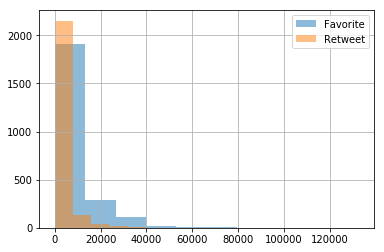

In [69]:
#Here we will see the relation between retweets and Favorites (likes)

import matplotlib.pyplot as plt
tw1_clean.Favorite.hist(alpha=0.5, label='Favorite')
tw1_clean.Retweet.hist(alpha=0.5, label='Retweet')
plt.legend();

### Insight 2

In [70]:
#We will find the value of dog type then draw a chart 
tw['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [71]:
tw['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [72]:
tw['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [73]:
tw['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

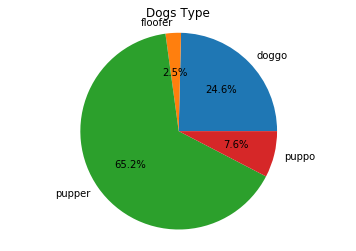

In [74]:
dogs_counts = [97,10,257,30]
dogs_type = 'doggo','floofer','pupper','puppo'
plt.pie(dogs_counts,labels=dogs_type,autopct='%1.1f%%')
plt.title('Dogs Type')
plt.axis('equal')
plt.show()

### Insight 3

In [75]:
#Here we will take the counts of image
img_counts = im['img_num'].value_counts()

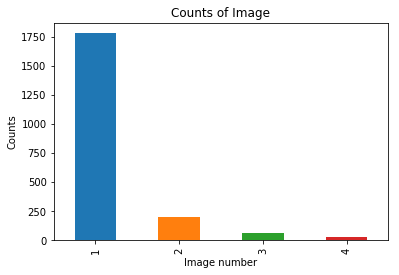

In [76]:
img_counts.plot(kind='bar')
plt.title('Counts of Image')
plt.xlabel('Image number')
plt.ylabel('Counts');

In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Mohammed_Aldamadi_Wrangle_act.ipynb'])

255